# <center>**Capstone Project 3: <br> Customer Lifetime Value** <br> </center>
<center> Cinira Harsaning Aziz </center>

---
# **1. Business Problem Understanding**

## **1.1. Background Context**

Sebuah perusahaan yang bergerak di bidang asuransi otomatif memiliki data untuk informasi existing customer mereka, seperti jenis kendaraan, jenis asuransi, hingga perhitungan customer lifetime value (CLV) dari tiap customer. ``CLV merupakan total nilai finansial yang diberikan tiap customer atau pendapatan yang dihasilkan dari setiap customer ke perusahaan selama periode bisnis berlaku.`` Memahami dan meningkatkan CLV di perusahaan dapat meningkatkan keuntungaan perusahaan, merencanakan anggaran yang lebih efektif, dan merancang strategi marketing yang tepat sasaran. Sehingga, Perusahaan asuransi otomatif ini ingin menggunakan informasi CLV tersebut untuk memprediksi nilai CLV dari new customer serta mengidentifikasi faktor-faktor yang memengaruhi CLV dalam upaya memaksimalkan profitabilitas.

## **1.2. Problem Statement**

Selama ini, perusahaan asuransi otomotif tersebut belum menerapkan strategi pemasaran yang tepat sasaran, khususnya dalam menargetkan customer mereka. Salah satu penyebabnya adalah pendekatan marketing yang seragam, di mana anggaran dialokasikan sama rata untuk semua tipe pelanggan. Akibatnya, perusahaan membayar lebih untuk low-value customer dan kehilangan high-value customer. Selain itu, proses perhitungan nilai CLV yang dilakukan secara manual juga sangat tidak efisien, memakan waktu dan sumber daya yang signifikan. Ketidakmampuan untuk memprediksi nilai CLV secara otomatis dan akurat ini menghambat perusahaan dalam merancang strategi marketing yang efektif dan mengoptimalkan profit perusahaan.

## **1.3. Goals**

Perusahaan asuransi otomotif memerlukan alat untuk memprediksi nilai CLV untuk memahami faktor-faktor yang memengaruhi profitabilitas dan menentukan biaya akuisisi customer. Dengan adanya alat ini, divisi marketing hanya cukup menggunakan data yang ada atau informasi asuransi customer (seperti jenis asuransi, jumlah polis, premi, dan klaim) untuk mendapat prediksi angka CLV. Hal tersebut mampu menggantikan proses manual, sehingga memungkinkan perusahaan untuk merancang strategi pemasaran yang lebih tertarget dan efektif.

## **1.4. Analytic Approach**

Kita akan menganalisis data untuk mengidentifikasi pola dari fitur-fitur yang membedakan satu customer dari yang lain. Selanjutnya, kita akan mengembangkan model regresi untuk menyediakan alat dalam memprediksi nilai CLV, yang akan membantu perusahaan memprediksi profit dari setiap customer.

## **1.5. Metric Evaluation**
Evaluasi metrik yang akan digunakan yaitu:
- RMSE adalah nilai rataan akar kuadrat dari error 
- MAE adalah rataan nilai absolut dari error
- MAPE adalah rataan nilai persentase error yang dihasilkan oleh model regresi
- R-squared adalah nilai seberapa baik model dapat merepresentasikan varians keseluruhan data

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi sesuai dengan limitasi fitur yang digunakan. 

Semakin mendekati 1 nilai R-squared yang dihasilkan, berarti semakin fit pula modelnya terhadap data observasi.

---
# **Import Library**

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score, cross_validate
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

---
# **2. Data Understanding**

## **2.1. Read Data**

In [3]:
initial_dataset = pd.read_csv('data_customer_lifetime_value.csv')
data = initial_dataset
data

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


## **2.2. Attribute Definition**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


- Dataset yang digunakan mencakup data tentang pelanggan dan polis asuransi kendaraan mereka sejak pertama kali menggunakan produk dari perusahaan asuransi otomotif ini.
- Setiap baris data mewakili informasi mengenai tiap customer dan polis asuransi kendaraan yang dimilikinya.

| **No** | **Feature** | **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1. | `Vehicle Class`             | Object    | Tipe kendaraan customer |
| 2. | `Coverage`                  | Object    | Tipe proteksi yang diberikan pada kendaraan |
| 3. | `Renew Offer Type`          | Object    | Tipe penawaran pembaharuan asuransi |
| 4. | `EmploymentStatus`          | Object    | Status pekerjaan cutomer |
| 5. | `Marital Status`            | Object    | Status pernikahan cutomer |
| 6. | `Education`                 | Object    | Tingkat pendidikan customer |
| 7. | `Number of Policies`        | Float     | Jumlah polis yang dimiliki customer |
| 8. | `Monthly Premium Auto`      | Float     | Premi customer perbulan (USD) |
| 9. | `Total Claim Amount`        | Float     | Total claim customer (USD) |
| 10. | `Income`                   | Float     | Pendapatan customer (USD) |
| 11. | `Customer Lifetime Value`  | Float     | Customer Lifetime Value (Target) |

- Dataset ini akan digunakan untuk memprediksi nilai Customer Lifetime Value berdasarkan informasi pada 10 kolom lainnya.
- Data Kategorik (7 kolom): `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. (Meskipun Number of Policies berupa angka, dalam analisis ini akan dianggap sebagai data kategorik).
- Data Numerik (4 kolom): `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

## **2.3. Exploratory Data Analysis**

### **Descriptive Analysis**

In [5]:
print('Descriptive Stats for Number')
display(data.describe(include='number'))
print('Descriptive Stats for Object')
display(data.describe(include='object'))

Descriptive Stats for Number


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Descriptive Stats for Object


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dari descriptive statistic diatas kita dapat melihat:
- Data Numerik: Memberikan gambaran umum kuantitatif seperti jumlah data, rata-rata, dan deviasi standar.
- Data Kategorik: Menunjukkan pola preferensi pelanggan terhadap jenis kendaraan, cakupan asuransi, penawaran perpanjangan, serta karakteristik demografis seperti status pekerjaan, perkawinan, dan pendidikan.
- Findings Utama: Polis kendaraan untuk tipe Four-Door Car, coverage tipe Basic, dan Renew Offer tipe 1 adalah yang paling populer. Sedangkan kharakteristik customer yang paling dominan adalah yang sudah bekerja, menikah, dan memiliki gelar sarjana.

### **Distribution Analysis**

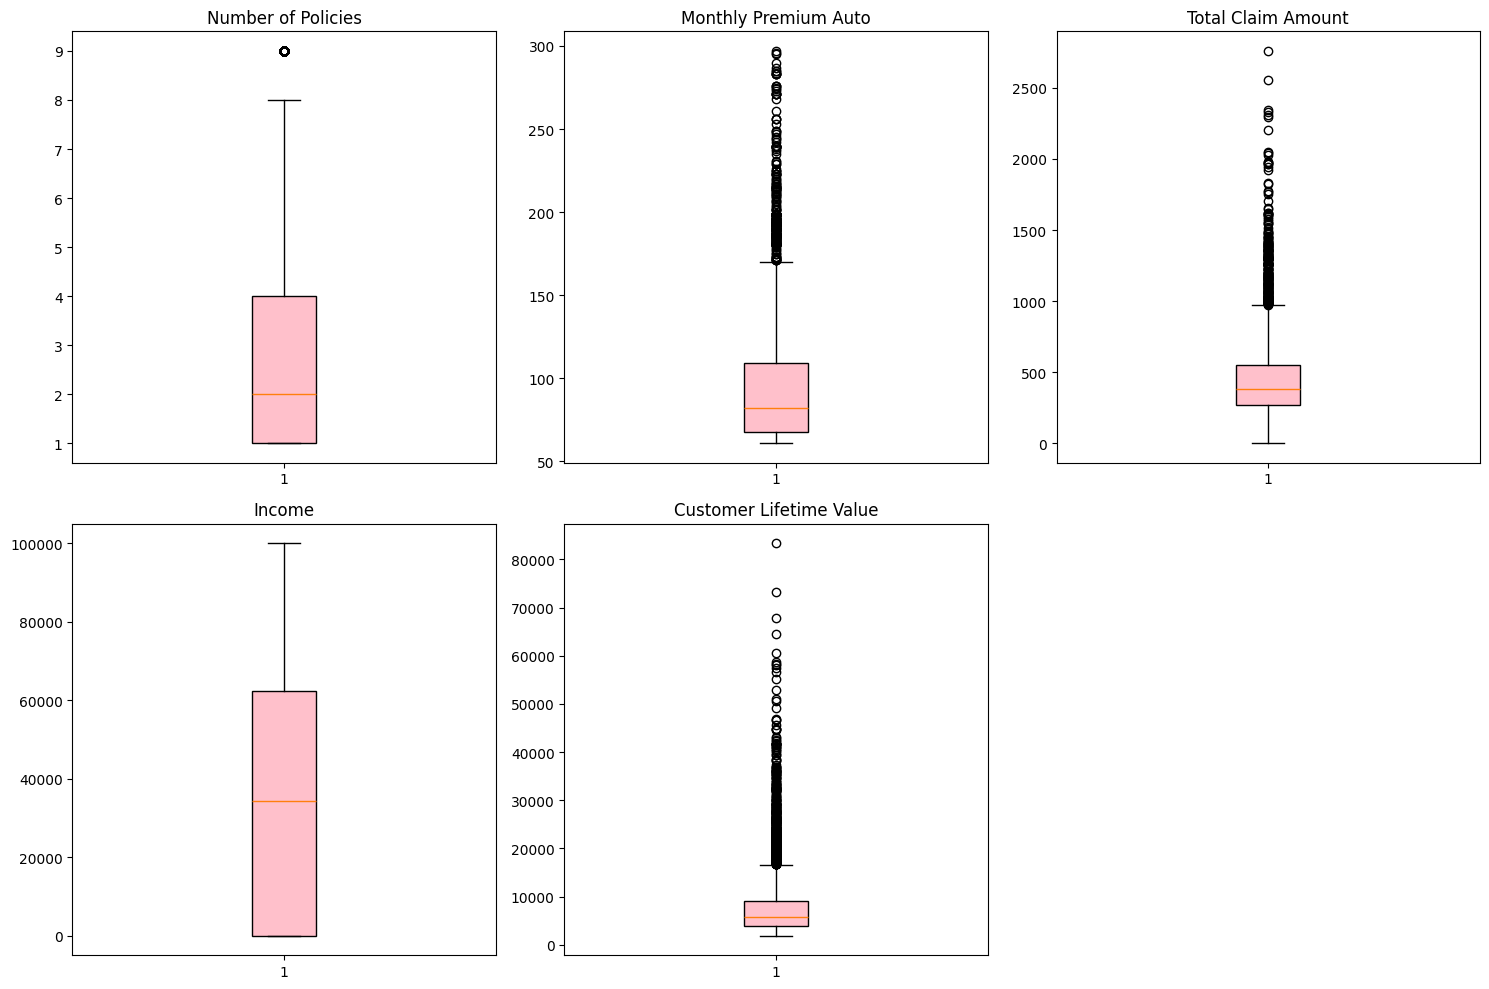

In [6]:
number_col = data.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col // 3) + (num_col % 3 > 0)

plt.figure(figsize=(15,10))

# Create a list of yellow colors (you can change 'goldenrod' to any other color)
colors = ['pink' for i in range(num_col)]

for i, column in enumerate(number_col,1) :
  plt.subplot(num_row,3,i)
  # Use 'patch_artist=True' to create boxes as artists 
  # and color them with the colors list
  bplot = plt.boxplot(data[column].dropna(), patch_artist=True)
  for box in bplot['boxes']:
      box.set_facecolor(colors[i-1])  # Set the color of each box
  plt.title(column)

plt.tight_layout()
plt.show()


Berdasarkan plot distribusi, fitur-fitur numerik seperti `Customer Lifetime Value`, `Income`, `Total Claim Amount`, `Monthly Premium Auto`, dan `Number of Policies` menunjukkan distribusi miring ke kanan (right-skewed). Hal ini mengindikasikan adanya skewness positif pada variabel-variabel tersebut.

### **Correlation**

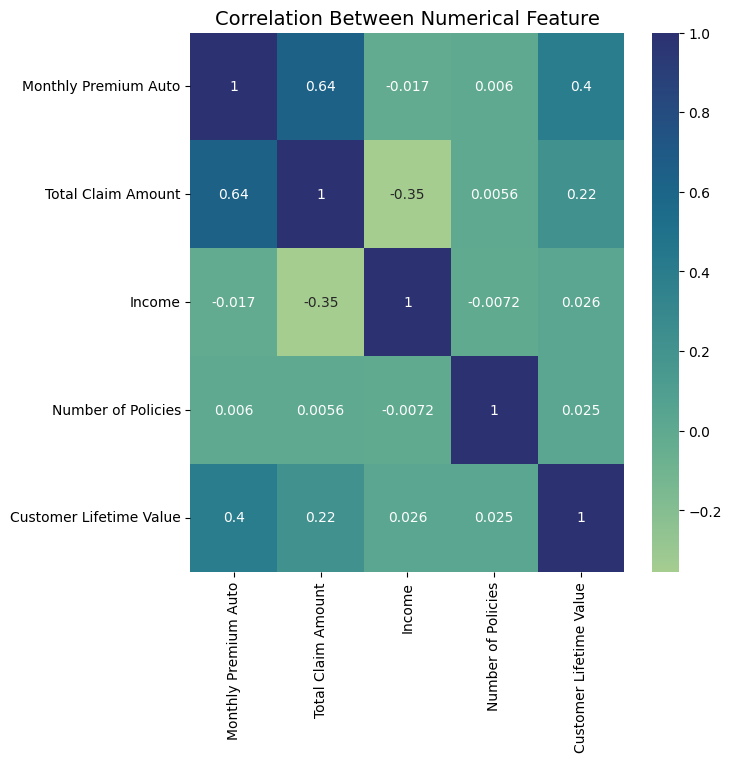

In [7]:
heatmapdata = ["Monthly Premium Auto", "Total Claim Amount", "Income", "Number of Policies", "Customer Lifetime Value"]

plt.figure(figsize=(7, 7), facecolor = "none")
sns.heatmap(data[heatmapdata].corr(), annot = True, cmap = "crest")

plt.title("Correlation Between Numerical Feature", size = 14)
plt.show()

Dari correlation matrix diatas menunjukkan bahwa korelasi paling tinggi terhadap CLV dimiliki oleh fitur 'Monthly Premium Auto', dengan nilai 0.49

---
# **3. Data Cleansing**

## **3.1. Drop Duplicate Data**

In [8]:
# Checking Duplicate Row
data.duplicated().sum()

618

In [9]:
# Menampilkan dataframe yang berisi data duplikat
data[data.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Pada dataset ditemukan 618 data duplikat, yaitu data customer yang memiliki nilai yang identik dengan satu sama lain. Untuk meningkatkan akurasi model, kami akan menghapus data duplikat ini. Adanya duplikat data dapat menyebabkan model terlalu fokus pada pola yang berulang dan mengabaikan variasi data, sehingga menghasilkan prediksi yang bias. Oleh karena itu, selanjutnya akan di drop 618 data duplikat terlebih dahulu.

In [10]:
# Drop Duplicate Data

data.drop_duplicates(keep='first', inplace=True)
data

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


## **3.2. Handling Missing Value**

In [11]:
# Check Missing Value
data.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Tidak ditemukan missing value pada dataset.

### **Check Missing Value pada Income yang bernilai 0**

In [12]:
data[data["Income"]==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


In [13]:
condition = data['Income'].isnull()
result = data[condition]['Income'].isnull() & (data[condition]['EmploymentStatus'] == 'Unemployed')

if result.all():
    print("Semua baris dengan 'Income' null mempunyai 'Income' null dan 'EmploymentStatus' Unemployed.")
elif result.any():
    print("Beberapa baris dengan 'Income' null mempunyai 'Income' null dan 'EmploymentStatus' Unemployed.")
else:
    print("Tidak ada baris dengan 'Income' null mempunyai 'Income' null dan 'EmploymentStatus' Unemployed.")

Semua baris dengan 'Income' null mempunyai 'Income' null dan 'EmploymentStatus' Unemployed.


Setelah di check, semua customer dengan pendapatan 0 terkonfirmasi memiliki unemployement status 'unemployed'. Oleh karena itu, data ini dianggap valid dan tidak memerlukan treatment lebih lanjut.

## **3.3. Handling Outlier**

Analisis awal menunjukkan adanya sejumlah besar outlier pada beberapa fitur data. Untuk meningkatkan kualitas data dan mengurangi dampak outlier untuk model yang akan dibangun nanti, maka akan dilakukan penghapusan untuk beberapa data outlier dengan metode IQR dan pemahaman terhadap domain knowledge. 

Oleh karena itu, model yang dihasilkan hanya mampu melakukan prediksi pada data baru yang memiliki rentang nilai serupa dengan data train yang telah dibersihkan. Prediksi di luar rentang nilai berpotensi menghasilkan bias yang signifikan.

In [14]:
# Membuat function deteksi nilai IQR & percentage Outlier
def outlier_detection(feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Nilai IQR {feature}: {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Nilai Upperbound {feature}: {upper} dan Nilai Lowerbound: {lower}')

    amount_outlier = data[data[feature] > upper].count()['Customer Lifetime Value']
    percentage_outlier = ((amount_outlier)/len(data))*100

    print(f'Jumlah Outlier {feature}: {amount_outlier}')
    print(f'% Outlier {feature} terhadap data: {percentage_outlier}')

### **Menentukan Batas `Customer Lifetime Value`**

In [15]:
# Melihat nilai IQR dari 'Number of Policies'
outlier_detection('Customer Lifetime Value')

Nilai IQR Customer Lifetime Value: 5064.1236284999995
Nilai Upperbound Customer Lifetime Value: 16624.75007525 dan Nilai Lowerbound: -3631.744438749999
Jumlah Outlier Customer Lifetime Value: 449
% Outlier Customer Lifetime Value terhadap data: 8.889328845773115


In [16]:
data[["Customer Lifetime Value"]].describe()

,Customer Lifetime Value
count,5051.000000
mean,8059.483178
std,6989.189674
min,1898.007675
25%,3964.441004
50%,5837.528088
75%,9028.564632
max,83325.381190


Analisis distribusi Customer Lifetime Value menunjukkan bahwa 75% data memiliki nilai di bawah 9028.56, dengan nilai maksimum mencapai 83325.38. Distribusi ini menunjukkan kecenderungan positif (positive skewness). Meskipun demikian, terdapat 449 data dengan nilai CLV yang melebihi batas atas (upperbound) sebesar 16624.75. Mengetahui bahwa data yang berapa di atas upperbound kurang dari 10% apabila dibandingkan dengan keseluruhan data, maka penghapusan outlier di atas upperbound tidak akan menghasilkan dampak signifikan terhadap model.

### **Menentukan Batas `Total Claim Amount`**

In [17]:
# Melihat nilai IQR dari 'Total Claim Amount'
outlier_detection('Total Claim Amount')

Nilai IQR Total Claim Amount: 296.34681750000004
Nilai Upperbound Total Claim Amount: 992.6433477500001 dan Nilai Lowerbound: -192.74392225000005
Jumlah Outlier Total Claim Amount: 217
% Outlier Total Claim Amount terhadap data: 4.296178974460503


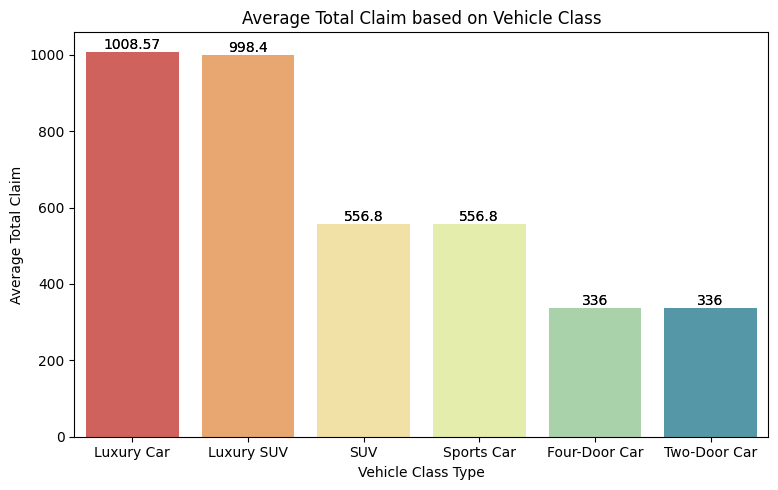

In [18]:
df = pd.DataFrame(data)

# Subplot for median price based on area
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Create barplot with median price
sns.barplot(x='Vehicle Class', y='Total Claim Amount', data=df, palette='Spectral', estimator=np.median, ci=None, order=df.groupby('Vehicle Class')['Total Claim Amount'].median().sort_values(ascending=False).index)

# Add labels to bars
ax = sns.barplot(x='Vehicle Class', y='Total Claim Amount', data=df, palette='Spectral', estimator=np.median, ci=None, order=df.groupby('Vehicle Class')['Total Claim Amount'].median().sort_values(ascending=False).index)
for container in ax.containers:
    ax.bar_label(container)  # Add labels to each bar

# Set title, xlabel, and ylabel
plt.title('Average Total Claim based on Vehicle Class')
plt.ylabel('Average Total Claim')
plt.xlabel('Vehicle Class Type')

plt.tight_layout()
plt.show()

In [19]:
data.groupby("Vehicle Class")["Total Claim Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Luxury Car,101.0,1103.927488,518.906203,32.874675,873.600000,1008.569798,1396.702365,2759.794354
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Two-Door Car,1059.0,347.867548,193.766877,1.332349,230.655925,336.000000,456.488343,1261.943541


Penghapusan outlier pada variabel Total Claim Amount dengan batas atas $992.6433477500001 akan berdampak signifikan terhadap kelas Luxury Car dan Luxury SUV, mengingat nilai median kedua kelas ini berada di atas batas tersebut. Penghapusan untuk data diatas batas tersebut dapat menyebabkan hilangnya sebagian besar data pada kelas Luxury Car dan Luxury SUV. Oleh karena itu, dibutuhkan analisis lebih lanjut untuk mencari batasa outlier yang lebih sesuai dengan konteks bisnis.

In [20]:
# Dataframe untuk Outilers Total Claim

outlier_totalclaim = data[(data['Total Claim Amount'] < -192.74392225000005) | (data['Total Claim Amount'] > 992.6433477500001)]
outlier_totalclaim['total_claim'] = outlier_totalclaim['Total Claim Amount'].astype(float)

In [21]:
# Mencari New Upperbound dari Dataframe Outlier Total Claim

Q1_totalclaim = outlier_totalclaim.total_claim.quantile(.25)
Q3_totalclaim = outlier_totalclaim.total_claim.quantile(.75)
IQR_totalclaim = Q3_totalclaim - Q1_totalclaim

# Define the New Upperbound      
                 
upperbound_totalclaim = Q3_totalclaim + 1.5 * IQR_totalclaim

print('Upper limit of Total Claim terbaru: ', upperbound_totalclaim)

Upper limit of Total Claim terbaru:  1861.6505425


Untuk menjaga representasi data dari kedua kelas kendaraan dan menghindari penghapusan data yang masih relevan, dibentuklah batas baru untuk upperbound dari Total Claim yang lebih sesuai yaitu $1861.6505425.

Meskipun demikian, model yang dihasilkan akan memiliki keterbatasan dalam memprediksi klaim yang jauh melebihi batas yang ditetapkan yaitu >$1861.6505425.

### **Menentukan Batas `Monthly Premium Auto`**

In [22]:
# Melihat nilai IQR dari 'Monthly Premium Auto'
outlier_detection('Monthly Premium Auto')

Nilai IQR Monthly Premium Auto: 41.0
Nilai Upperbound Monthly Premium Auto: 170.5 dan Nilai Lowerbound: 6.5
Jumlah Outlier Monthly Premium Auto: 252
% Outlier Monthly Premium Auto terhadap data: 4.989111067115423


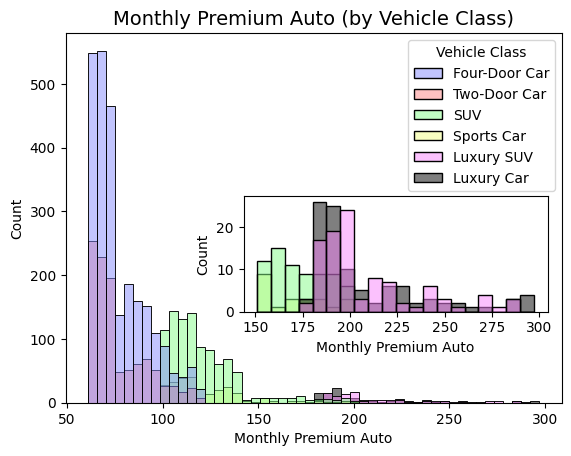

In [23]:
# Melihat Distribusi Data dari Monthly Premium Auto
fig, ax1 = plt.subplots(facecolor = "none")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = data, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = False, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = data[data["Monthly Premium Auto"] > 150], bins = 20, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = False, palette = ["#F884FC", "black", "#84FC89", "#F1FC84"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Monthly Premium Auto (by Vehicle Class)", size = 14)
plt.show()

Analisis terhadap fitur Monthly Premium Auto menunjukkan adanya anomali pada data di atas $170.5. **Menghapus data di atas nilai ini akan menghilangkan 2 buah kelas dari variabel Vehicle Class, yaitu: Luxury Car & Luxury SUV.** Oleh karena itu, dibutuhkan analisis lebih lanjut untuk mencari batasa outlier yang lebih sesuai dengan konteks bisnis.

In [24]:
# Dataframe untuk Outilers Monthly Premium Auto

outlier_monthlypremi = data[(data['Monthly Premium Auto'] < 6.5) | (data['Monthly Premium Auto'] > 170.5)]
outlier_monthlypremi['monthly_premi'] = outlier_monthlypremi['Monthly Premium Auto'].astype(float)

In [25]:
# Mencari New Upperbound dari Dataframe Monthly Premium Auto

Q1_monthlypremi = outlier_monthlypremi.monthly_premi.quantile(.25)
Q3_monthlypremi = outlier_monthlypremi.monthly_premi.quantile(.75)
IQR_monthlypremi = Q3_monthlypremi - Q1_monthlypremi

# Define the New Upperbound        
                 
upperbound_monthlypremi = Q3_monthlypremi + 1.5 * IQR_monthlypremi

print('Upper limit of Monthly Premium Auto terbaru: ', upperbound_monthlypremi)

Upper limit of Monthly Premium Auto terbaru:  251.625


Untuk menjaga representasi data yang beragam dan menghindari penghapusan data yang masih relevan, dibentuklah batas baru untuk upperbound dari Total Claim yang lebih sesuai yaitu $251.625

Meskipun demikian, model yang dihasilkan akan memiliki keterbatasan dalam memprediksi klaim yang jauh melebihi batas yang ditetapkan yaitu >$251.625.

### **Menentukan Batas `Number of Policies`**

In [26]:
# Melihat nilai IQR dari 'Number of Policies'
outlier_detection('Number of Policies')

Nilai IQR Number of Policies: 3.0
Nilai Upperbound Number of Policies: 8.5 dan Nilai Lowerbound: -3.5
Jumlah Outlier Number of Policies: 228
% Outlier Number of Policies terhadap data: 4.513957632152049


In [27]:
# Melihat unique value dari 'Number of Policies'
print('Jumlah unique value pada \'Number of Policies\':', data['Number of Policies'].unique())

Jumlah unique value pada 'Number of Policies': [2. 6. 1. 8. 5. 3. 7. 4. 9.]


Pada fitur Number of Policies, ditemukan adanya nilai maksimum 9 yang melampaui batas atas (upperbound). Meskipun nilai ini dapat dikategorikan sebagai outlier, namun data ini tetap dipertahankan dalam analisis. Keputusan ini didasarkan pada dua pertimbangan utama: 
1. Pertama, jumlah data pada nilai 9 cukup signifikan (228 pelanggan); 
2. Kedua, terdapat korelasi positif yang kuat antara number of policies dengan CLV. Sehingga, penghapusan data di atas upperbound akan memiliki pengaruh yang signifikan untuk model yang akan dibangun.

Dengan mempertahankan data ini, kita dapat mengevaluasi secara lebih komprehensif pengaruh jumlah polis terhadap model prediksi dan potensi peningkatan nilai bisnis.

### **Drop Outlier**

In [28]:
# Filter the data to remove outliers
data = data[data['Customer Lifetime Value'] <= 16624.75007525]
data = data[data['Total Claim Amount'] <= 1861.6505425]
data = data[data['Monthly Premium Auto'] <= 251.625]

# **Clean Dataset**

In [29]:
data.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4583 non-null   object 
 1   Coverage                 4583 non-null   object 
 2   Renew Offer Type         4583 non-null   object 
 3   EmploymentStatus         4583 non-null   object 
 4   Marital Status           4583 non-null   object 
 5   Education                4583 non-null   object 
 6   Number of Policies       4583 non-null   float64
 7   Monthly Premium Auto     4583 non-null   float64
 8   Total Claim Amount       4583 non-null   float64
 9   Income                   4583 non-null   float64
 10  Customer Lifetime Value  4583 non-null   float64
dtypes: float64(5), object(6)
memory usage: 429.7+ KB


In [31]:
data.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4583.000000,4583.000000,4583.000000,4583.000000,4583.000000
mean,3.072442,89.940214,414.323334,37662.389701,6310.255903
std,2.467243,29.133176,263.036715,30676.035359,3316.133604
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,250.575918,0.000000,3700.402629
50%,2.000000,80.000000,369.600000,34244.000000,5484.588155
75%,4.000000,106.000000,537.600000,62296.500000,8151.409095
max,9.000000,247.000000,1833.182529,99934.000000,16589.712370


In [32]:
print('Shape before cleansing: ', initial_dataset.shape)
print('Shape after cleansing: ',data.shape)
print(f'{(initial_dataset.shape[0]) - (data.shape[0])} rows were removed or')
print(f'{round(((1 - (data.shape[0]/initial_dataset.shape[0]))*100), 2)}% of the entries were removed.')

Shape before cleansing:  (5051, 11)
Shape after cleansing:  (4583, 11)
468 rows were removed or
9.27% of the entries were removed.


---
# **4. Modelling**

## **4.1. Data Spliting**

In [33]:
# Split Data
X = data.drop(columns="Customer Lifetime Value", axis = 1)  # Feature
y = data["Customer Lifetime Value"]                         # Target : Customer Lifetime Value

In [34]:
# Memisahkan antara train set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.30,
    random_state= 0
    )
                                        

## **4.2. Encoding**

Untuk keperluan machine learning, saya mengubah data kategorikal menjadi numerik menggunakan dua metode:

- One-hot encoding: untuk mengubah data kategorikal yang tidak memiliki tingkatan ('Vehicle Class', 'EmploymentStatus', 'Marital Status'). Metode ini cocok karena data-data ini memiliki sedikit nilai unik dan tidak ada tingkatan di antara nilai-nilai tersebut.
- Ordinal encoding: untuk mengubah data kategorikal yang memiliki tingkatan ('Coverage', 'Renew Offer Type', 'Education'). Metode ini cocok karena nilai-nilai dalam data ini memiliki tingkatan.

Semua proses encoding ini akan dilakukan secara otomatis menggunakan ColumnTransformer dan kemudian diintegrasikan ke dalam pipeline model.

In [35]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

coverage_mapping = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
rot_mapping = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
education_mapping = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "EmploymentStatus", "Marital Status"]), # Onehot encoder untuk data nominal
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = coverage_mapping), ["Coverage"]),                   # Ordinal encoder untuk data ordinal
    ("rot_ordinal", ce.OrdinalEncoder(mapping = rot_mapping), ["Renew Offer Type"]),                     # ---------------//-----------------
    ("education_ordinal", ce.OrdinalEncoder(mapping = education_mapping), ["Education"])                 # ---------------//-----------------
], remainder = "passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Marital Status']),
                                ('coverage_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                 ['Coverage']),
                                ('rot_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': None      0
Offer1    1
Offer2    2
Offer3    3
Offer4    4
dtype: int64}]),
                                 ['Renew Offer Type']),
                                ('education_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Education'])])

In [36]:
# cek hasil encoding
transformer.fit(data)

result = transformer.transform(data)

columns_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names()) + list(transformer.transformers_[2][1].get_feature_names()) + list(transformer.transformers_[3][1].get_feature_names()) + ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

result_df = pd.DataFrame(result, columns=columns_names)
result_df.head()

,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Coverage,Renew Offer Type,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,90.0,571.479602,11828.0,10083.486880
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,6.0,62.0,114.514440,44762.0,4943.386117
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,62.0,257.248789,21514.0,11981.984810
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,1.0,116.0,556.800000,17913.0,4550.856045
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,62.0,355.820799,19030.0,2372.155492


## **4.3. Define Scaler**

Karena rentang nilai fitur dalam data sangat beragam, diperlukan standarisasi untuk menyamakan skala semua fitur numerik. Pada tahap cross validation, kita akan menggunakan MinMaxScaler sebagai metode standarisasi awal. MinMaxScaler akan menormalisasi data numerik ke dalam rentang 0 hingga 1. Mengingat data telah dibersihkan dari outlier, penggunaan MinMaxScaler dianggap aman karena tidak akan terpengaruh secara signifikan oleh outlier. Scaler terbaik akan ditentukan lebih lanjut pada proses hyperparameter tuning.

In [37]:
# Define scaler
minmax = MinMaxScaler()

## **4.4. Choose a Benchmark Model**

Pada tahap awal, kita akan mengevaluasi 9 model benchmark. Untuk mengukur kinerja model, kita akan menggunakan metrik RMSE, MAE, MAPE, dan R-squared. Pemilihan metrik ini didasarkan pada kemampuannya untuk mengukur berbagai aspek kesalahan prediksi, seperti besarnya kesalahan rata-rata (RMSE, MAE), persentase kesalahan rata-rata (MAPE), dan seberapa kuat hubungan antara prediksi dengan nilai sebenarnya (R-squared).

In [38]:
# Define algoritma yang digunakan
lr = LinearRegression()
lasso = Lasso(alpha = 0.001)
rid = Ridge(alpha = 0.001)
knn = KNeighborsRegressor(n_neighbors = 15)
dt = DecisionTreeRegressor(max_depth = 3, random_state= 0)          # Parameter max_depth digunakan untuk membatasi kedalaman pohon ggar tidak overfit
rf = RandomForestRegressor(max_depth = 3, random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(max_depth = 3, random_state= 0)
gbr = GradientBoostingRegressor(max_depth = 3, random_state= 0)

model = [lr, lasso, rid, knn, dt, rf, ada, xgb, gbr]

In [39]:
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Evaluation Metrics yang digunakan
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}

for i in model:
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', minmax),
        ('model', i)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_rmse.append(cv_score['test_rmse'])
    nilai_mean_rmse.append(cv_score['test_rmse'].mean())
    nilai_std_rmse.append(cv_score['test_rmse'].std())

    # MAE Score
    score_mae.append(cv_score['test_mae'])
    nilai_mean_mae.append(cv_score['test_mae'].mean())
    nilai_std_mae.append(cv_score['test_mae'].std())

    # MAPE Score
    score_mape.append(cv_score['test_mape'])
    nilai_mean_mape.append(cv_score['test_mape'].mean())
    nilai_std_mape.append(cv_score['test_mape'].std())

    # R-Square Score    
    score_r2.append(cv_score['test_r2'])
    nilai_mean_r2.append(cv_score['test_r2'].mean())
    nilai_std_r2.append(cv_score['test_r2'].std())

In [40]:
# Evaluasi hasil dari 9 kandidat algoritma yang digunakan

pd.DataFrame({
    'model' : ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost'],
    'mean_RMSE': nilai_mean_rmse,
    'std_RMSE': nilai_std_rmse,
    'mean_MAE': nilai_mean_mae,
    'std_MAE': nilai_std_mae,
    'mean_MAPE': nilai_mean_mape,
    'std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2' : nilai_std_r2
})

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-2787.645379,58.882899,-2081.627553,31.315369,-0.380615,0.006305,0.277594,0.022100
1,Lasso,-2787.644438,58.884134,-2081.628285,31.316771,-0.380615,0.006305,0.277594,0.022101
2,Ridge,-2787.644536,58.884012,-2081.631622,31.316273,-0.380616,0.006305,0.277594,0.022101
3,KNN,-2872.232110,57.036341,-2078.727718,55.160788,-0.388493,0.010900,0.233004,0.024683
4,Decision Tree,-1339.593474,48.151011,-832.612593,16.510044,-0.116834,0.002294,0.832848,0.013287
5,Random Forest,-1288.161570,61.215439,-776.352448,45.758618,-0.108724,0.005925,0.845277,0.015650
6,AdaBoost,-1415.286441,58.597571,-1018.805874,31.613266,-0.152199,0.004044,0.813378,0.016864
7,XGBoost,-932.278645,34.475255,-450.881990,4.003676,-0.066573,0.001816,0.919085,0.006110
8,Gradient Boost,-910.405982,41.452927,-396.979273,5.481808,-0.051826,0.000977,0.922788,0.007031


Analisis metrik evaluasi menunjukkan bahwa model Gradient Boosting memiliki nilai error yang paling kecil, ditunjukkan oleh nilai RMSE, MAE, dan MAPE terendah dan nilai R2 yang paling mendekati 1. Dengan demikian, model **``Gradient Boosting``** akan digunakan sebagai model prediksi selanjutnya.

## **4.5. Prediction with Test Set**

Prediksi pada test set dengan menggunakan model Gradient Boosting.

In [41]:
# Melakukan fit terhadap keseluruhan data train, dan memprediksi 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

gbr = GradientBoostingRegressor(max_depth = 3, random_state= 0)
pipe_model = Pipeline([
    ('prep', transformer),
    ('scaler', minmax),
    ('model', xgb)
])

pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)

def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    r2 = r2_score(test, pred)
    return pd.DataFrame({"RMSE" : rmse, "MAE" : mae, "MAPE" : mape, "R2" : r2}, index = [model_name])

score_before_tuning = regression_score("Gradient Boost (before tuning)", y_test, y_pred)
score_before_tuning

,RMSE,MAE,MAPE,R2
Gradient Boost (before tuning),933.163021,458.448323,0.066661,0.924336


## **4.5. Hyperparameter Tuning**

Prediksi pada test set dengan menggunakan model Gradient Boosting.

In [42]:
# Define scaler lainnya untuk di tuning mencari scaler terbaik
standard = StandardScaler()
robust = RobustScaler()

# Menggabungkan menjadi 1 list scaler
scaler = [robust, standard, minmax]

# Depth of Tree
max_depth = list(np.arange(3, 10))

# Learning rate
learning_rate = list(np.arange(0.01, 0.31, 0.05))

# Amount of Tree
n_estimators = list(np.arange(100, 301, 50))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.5, 1.01, 0.1))

# Minimum jumlah sampel split internal
min_samples_split = list(np.arange(2, 11))

# Minimum jumlah sampel di leaf
min_samples_leaf = list(np.arange(1, 5))

# Hyperparam space Gradient Boosting
hyperparam_space_gbr = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'scaler': scaler
}

In [43]:
# Benchmark model dengan hyperparameter tuning
gbr = GradientBoostingRegressor(random_state= 0)

# Membuat algorithm chains
estimator_gbr = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', gbr)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_gbr = RandomizedSearchCV(
    estimator = estimator_gbr, 
    param_distributions = hyperparam_space_gbr,
    n_iter = 200,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0
)

In [44]:
# Fitting data training untuk mencari parameter terbaik
random_gbr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('coverage_ordinal',
                                                                               OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                                               ['C...
                                                                     10],
                                        'model__n_estimators': [100, 150, 200,
                                                                250, 300],
                                        'model__subsample': [0.5, 0.6, 0.7,
                                                             0.7999999999999999,
                                                             0.8999999999999999,
                                                             0.9999999999999999],
                                        'scaler': [RobustScaler(),
                                                   StandardScaler(),
                                                   MinMaxScaler()]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [45]:
pd.DataFrame(random_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__subsample,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
168,1.139915,0.020743,0.017571,0.001279,StandardScaler(),0.9,150,5,4,4,...,9.735720,2,-0.047083,-0.049162,-0.049940,-0.049223,-0.048366,-0.048755,0.000973,6
78,0.938488,0.045782,0.019267,0.001844,RobustScaler(),0.8,150,7,3,3,...,4.995903,9,-0.050303,-0.050079,-0.053052,-0.050876,-0.049753,-0.050813,0.001178,9
49,0.536330,0.020135,0.018567,0.001870,RobustScaler(),0.6,100,3,4,3,...,11.483087,25,-0.054144,-0.055430,-0.053406,-0.055344,-0.054088,-0.054482,0.000784,19
93,1.058420,0.030550,0.018072,0.001117,RobustScaler(),1.0,100,4,4,5,...,8.221185,1,-0.044845,-0.043049,-0.045519,-0.045611,-0.042574,-0.044320,0.001268,1
30,0.639690,0.013650,0.017166,0.000743,RobustScaler(),0.7,100,7,2,4,...,14.185708,8,-0.051704,-0.056029,-0.055550,-0.055328,-0.050159,-0.053754,0.002367,14


In [46]:
print('Gradient Boost')
print('Best_score:', random_gbr.best_score_)
print('Best_params:', random_gbr.best_params_)

Gradient Boost
Best_score: -906.9002275792518
Best_params: {'scaler': StandardScaler(), 'model__subsample': 0.8999999999999999, 'model__n_estimators': 150, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 4, 'model__learning_rate': 0.060000000000000005}


Dari hasil hyperparameter tuning, kita mendapatkan hasil terbaik dari model Gradient Boost dengan hasil sebagai berikut :
|Parameter|Result|
|--|--|
|Scaler|StandardScaler|
|subsample|0.899|
|n_estimator|150|
|min_sample_split|5|
|min_sample_leaf|4|
|max_depth|4|
|learning_rate|0.06|

## **4.6. Prediction with Tuned Model**

In [47]:
model = {'Gradient Boost (after tuning)': GradientBoostingRegressor(max_depth = 3, random_state= 0)}

# Define model terhadap estimator terbaik
gbr_tuning = random_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(y_test, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(y_test, y_pred_gbr_tuning)
r2_gbr_tuning = r2_score(y_test, y_pred_gbr_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning, 'R2': r2_gbr_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
Gradient Boost (after tuning),905.173133,389.765329,0.050715,0.928807


**<ins>Performance Comparison Gradient Boost<ins>**

Before and After Hyperparameter Tuning

In [48]:
pd.concat(([score_before_tuning, score_after_tuning]), axis = 0)

,RMSE,MAE,MAPE,R2
Gradient Boost (before tuning),933.163021,458.448323,0.066661,0.924336
Gradient Boost (after tuning),905.173133,389.765329,0.050715,0.928807


Model mengalami peningkatan performa (nilai RMSE, MAE, MAPE berkurang dan R2 semakin mendekati 1) dengan dilakukannya hyperparameter tuning.

In [49]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
df_result = data[['Customer Lifetime Value']].copy()
df_result['yPred'] = gbr_tuning.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,10265.686541,-182.199661
1,4943.386117,5309.238637,-365.852520
2,11981.984810,9953.730928,2028.253882
3,4550.856045,4433.319584,117.536461
4,2372.155492,2448.374781,-76.219289
...,...,...,...
5663,8114.409136,8708.189463,-593.780327
5664,2442.216651,2527.349497,-85.132846
5665,12904.943360,13236.996314,-332.052954
5666,2447.053134,2498.749702,-51.696568


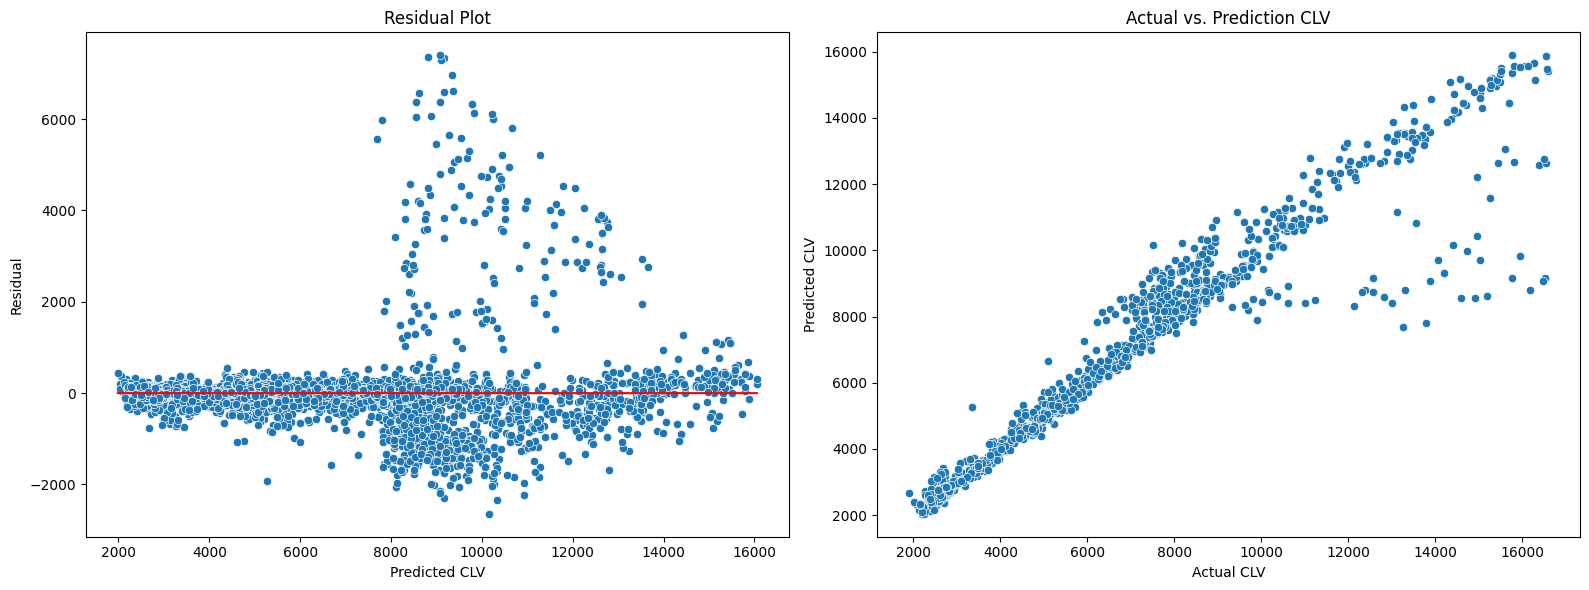

In [50]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

Analisis dari grafik Residual Plot dan Actual vs. Prediction CLV menunjukkan bahwa model prediksi CLV umumnya cukup baik pada nilai CLV yang rendah. Pada rentang CLV <8000, prediksi model cukup akurat, seperti yang terlihat dari residual plot yang cukup merata di sekitar garis nol. Namun, untuk nilai CLV yang tinggi (>0000), variansi residual tidak seragam dengan adanya overprediction (error mencapai 2000) maupun underprediction (error hingga 7000). 

Secara keseluruhan, Grafik Actual vs. Prediction CLV menunjukkan tren positif yang kuat dan hubungan linear antara nilai prediksi dan nilai aktual CLV, yang menunjukkan bahwa model mampu menangkap hubungan antara variabel prediktor dan variabel target. Sehingga dapat dikatakan bahwa model tetap dapat diandalkan untuk mengidentifikasi customer dengan CLV rendah.

## **4.6. Feature Importance**

In [51]:
tuned_estimator = random_gbr.best_estimator_

# Mendapatkan nama kolom dari tahapan preprocessing sebelumnya
list_features = (list(tuned_estimator[0].transformers_[0][1].get_feature_names_out()) +
            tuned_estimator[0].transformers_[1][2] +
            tuned_estimator[0].transformers_[2][2] +
            tuned_estimator[0].transformers_[3][2] +
            list(X_train.columns[tuned_estimator[0].transformers_[4][2]]))

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : list_features,
    'imp' : tuned_estimator['model'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
14,Number of Policies,6.583821e-01
15,Monthly Premium Auto,3.156281e-01
17,Income,1.149817e-02
16,Total Claim Amount,5.753912e-03
5,EmploymentStatus_Employed,2.006183e-03
12,Renew Offer Type,1.754254e-03
13,Education,9.780292e-04
11,Coverage,9.416294e-04
4,Vehicle Class_Two-Door Car,8.345453e-04
9,Marital Status_Married,7.345740e-04


Text(0.5, 1.0, 'Feature Importance')

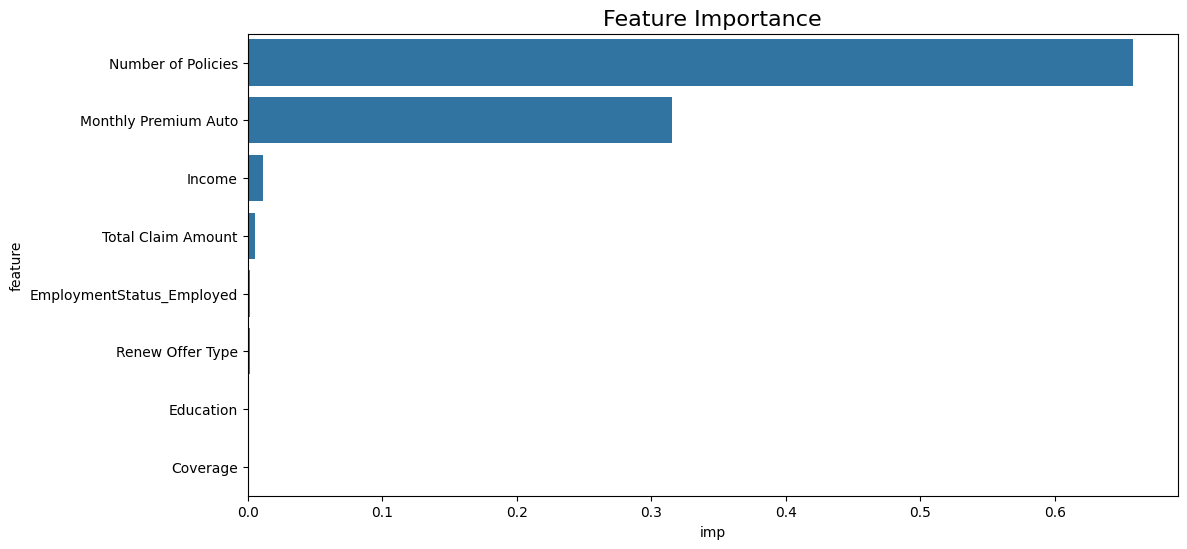

In [52]:
# Membuat Bar feature importance
plt.figure(figsize=(12,6))
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')
plt.title('Feature Importance', size=16)

Hasil pemodelan menunjukkan bahwa Number of Policies teridentifikasi sebagai fitur paling berpengaruh terhadap Customer Lifetime Value, diikuti oleh Monthly Premium Auto. Findings tersebut sejalan dengan asumsi awal yang menyatakan adanya korelasi positif kuat antara kedua fitur tersebut dengan nilai CLV.

-------------
# **Data Implementation**

Sesuai dengan tujuan dari penerapan model regresi dalam memprediksi Customer Lifetime Value, yaitu menghemat anggaran dan mengoptimalkan profit perusahaan asuransi, 

Maka kita akan membandingkan dua pendekatan:
1. Pertama, kita akan **menganalisis marketing cost jika perusahaan menerapkan anggaran (marketing cost) yang sama** untuk semua customer. 
2. Kedua, kita akan membandingkannya dengan skenario di mana **anggaran (marketing cost) disesuaikan berdasarkan nilai prediksi Customer Lifetime Value untuk setiap customer.**

Kedua pendekatan tersebut akan dibandingkan untuk nantinya mendapat gambaran dari potensi profit yang bisa dimaksimalkan apabila perusahaan menerapkan model prediksi CLV untuk tiap customer dan merancang biaya anggaran marketing yang lebih efisien dan tertarget.

In [78]:
# Menambah Informasi Marketing Acquisiton Cost yang sama untuk Tiap Customer ($900)

data_sample = data.copy()
data_sample['Customer Lifetime Value Pred'] = gbr_tuning.predict(X)
data_sample['Marketing Acquisition Cost'] = 900

*The average Customer Acquisition Cost (CAC) for automotive insurance companies is around $900 per customer.*

In [79]:
# Binning (Membuat Data Categorical) dari nilai Customer Lifetime Value Pred & Range yang digunakan
data_sample['clv group'] = pd.cut(data_sample['Customer Lifetime Value Pred'], 3)
display(data_sample['clv group'], data_sample['clv group'].value_counts(), data_sample)

0         (6675.42, 11364.946]
1          (1971.826, 6675.42]
2         (6675.42, 11364.946]
3          (1971.826, 6675.42]
4          (1971.826, 6675.42]
                 ...          
5663      (6675.42, 11364.946]
5664       (1971.826, 6675.42]
5665    (11364.946, 16054.472]
5666       (1971.826, 6675.42]
5668      (6675.42, 11364.946]
Name: clv group, Length: 4583, dtype: category
Categories (3, interval[float64, right]): [(1971.826, 6675.42] < (6675.42, 11364.946] < (11364.946, 16054.472]]

clv group
(1971.826, 6675.42]       2782
(6675.42, 11364.946]      1449
(11364.946, 16054.472]     352
Name: count, dtype: int64

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Customer Lifetime Value Pred,Marketing Acquisition Cost,clv group
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880,10265.686541,900,"(6675.42, 11364.946]"
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117,5309.238637,900,"(1971.826, 6675.42]"
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810,9953.730928,900,"(6675.42, 11364.946]"
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045,4433.319584,900,"(1971.826, 6675.42]"
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492,2448.374781,900,"(1971.826, 6675.42]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136,8708.189463,900,"(6675.42, 11364.946]"
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651,2527.349497,900,"(1971.826, 6675.42]"
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360,13236.996314,900,"(11364.946, 16054.472]"
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134,2498.749702,900,"(1971.826, 6675.42]"


Kita akan divide customer menjadi 3 segmen berdasarkan hasil prediksi CLV
1. Low-value Customer (2782 cust) clv diantara: **1971.826 - 6675.42**
2. Medium-value Customer (1449 cust) clv diantara: **6675.42 - 11364.946**
3. High-value Customer (352 cust) clv diantara: **11364.946 - 16054.472**

In [80]:
# Binning (Make Categorical) for value of Customer Lifetime Value Pred & its range group

data_sample['clv group'] = pd.cut(data_sample['Customer Lifetime Value Pred'], 3, labels='Low Medium High'.split())
display(data_sample['clv group'], data_sample['clv group'].value_counts(), data_sample.sample(5))

0       Medium
1          Low
2       Medium
3          Low
4          Low
         ...  
5663    Medium
5664       Low
5665      High
5666       Low
5668    Medium
Name: clv group, Length: 4583, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

clv group
Low       2782
Medium    1449
High       352
Name: count, dtype: int64

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Customer Lifetime Value Pred,Marketing Acquisition Cost,clv group
2622,Luxury SUV,Basic,Offer1,Employed,Married,Master,3.0,197.0,518.784640,40467.0,15167.044020,15318.098691,900,High
4000,Four-Door Car,Basic,Offer3,Employed,Married,College,2.0,70.0,336.000000,95419.0,8268.272933,10050.583931,900,Medium
3729,Four-Door Car,Premium,Offer1,Disabled,Married,Bachelor,1.0,113.0,831.625979,16701.0,4293.997319,4257.383147,900,Low
1945,Four-Door Car,Basic,Offer2,Unemployed,Single,Bachelor,3.0,74.0,407.218947,0.0,4691.043597,5018.428865,900,Low
944,Sports Car,Extended,Offer1,Employed,Married,College,3.0,133.0,628.207511,42513.0,10581.275000,10683.301824,900,Medium


Selanjutnya, kita akan membuat kolom baru untuk Marketing Cost yang disesuaikan dengan segmen customer:
1. Low-value Customer (2782 cust) clv diantara: **1971.826 - 6675.42** → ``Marketing Cost: $720`` ($900-(900*30%))
2. Medium-value Customer (1449 cust) clv diantara: **6675.42 - 11364.946** → ``Marketing Cost: $900``
3. High-value Customer (352 cust) clv diantara: **11364.946 - 16054.472** → ``Marketing Cost: $1080`` ($900+(900*30%))

In [125]:
# Membuat Marketing Cost Berdasarkan Segmentasi Customer

mapping = {'Low': 720, 'Medium': 900, 'High': 1080}
data_sample['Marketing Cost based Segmentation'] = data_sample['clv group'].map(mapping).astype(float)

data_sample

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Customer Lifetime Value Pred,Marketing Acquisition Cost,clv group,Marketing Cost based Segmentation
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880,10265.686541,900,Medium,900.0
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117,5309.238637,900,Low,720.0
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810,9953.730928,900,Medium,900.0
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045,4433.319584,900,Low,720.0
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492,2448.374781,900,Low,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136,8708.189463,900,Medium,900.0
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651,2527.349497,900,Low,720.0
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360,13236.996314,900,High,1080.0
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134,2498.749702,900,Low,720.0


In [137]:
total_marketing_cost1 = data_sample['Marketing Acquisition Cost'].sum()
total_marketing_cost2 = data_sample['Marketing Cost based Segmentation'].sum()
total_revenue = data_sample['Customer Lifetime Value'].sum()

total_marketing = total_marketing_cost1 + total_marketing_cost2
total_revenuee = total_revenue - total_marketing

profit_1 = total_revenue - total_marketing_cost1
profit_2 = total_revenue - total_marketing_cost2

profit_gain = profit_2 - profit_1

display (total_marketing_cost1, total_marketing_cost2, total_revenuee)

4124700

3687300.0

21107902.803724997

Sehingga, didapat bahwa perusahaan asuransi dapat mengehemat anggaran hingga memaksimalkan profit sebanyak **``$437.400``** Walaupun nominal tersebut dapat dimaksimalkan lebih lanjut mengetahui informasi terkait nominal marketing cost yang digunakan untuk melakukan kalkuasi profit gain terbatas.

---
# **5. Conclusion & Recommendation**

## **5.1. Conclusion**

Dalam proses pemodelan yang telah dilakukan, fitur "Number of Policies" dan "Monthly Premium Auto" menjadi faktor yang paling signifikan mempengaruhi Customer Lifetime Value (CLV). Temuan tersebut konsisten dengan asumsi awal bahwa kedua fitur tersebut memiliki korelasi positif yang kuat dengan CLV. Hal ini memberikan jawaban atas business problem mengenai aspek-aspek yang mempengaruhi CLV customer. Dengan mengetahui fitur-fitur yang memengaruhi CLV, perusahaan dapat memfokuskan strategi bisnisnya pada aspek-aspek tersebut untuk meningkatkan profitabilitas.

Metrik evaluasi yang digunakan untuk menilai model mencakup RMSE, MAE, MAPE, dan R Square. Setelah melakukan tuning hyperparameter, nilai MAE yang diperoleh adalah 389.765329. Ini berarti bahwa jika model digunakan untuk memperkirakan CLV perusahaan asuransi mobil dalam rentang yang sesuai dengan batas model (maksimal nilai CLV 16624.75), perkiraan CLV dapat menyimpang sekitar ±389.765329 dari nilai CLV sebenarnya. Sedangkan nilai MAPE yang diperoleh adalah 5%, yang menunjukkan bahwa jika model digunakan untuk memprediksi Customer Lifetime Value dalam rentang nilai yang sama dengan yang digunakan untuk pelatihan, rata-rata hasil prediksi CLV dapat meleset sekitar ±5% dari nilai yang sebenarnya.

## **Model Limitation**
Beberapa limitasi model yang terbentuk karena adanya rentang nilai yang digunakan untuk melatih model yaitu:
- Feature `Vehicle Class`: Luxury Car, Luxury SUV, SUV, Sports Car, Two-Door Car
- Feature `EmploymentStatus`: Employed, Medical Leave, Retired, Unemployed
- Feature `Marital Status`: Married, Single
- Feature `Coverage`: Basic, Extended, Premium
- Feature `Renew Offer Type`: Offer1, Offer2, Offer3, Offer4
- Feature `Education`: High School or Below, College, Bachelor, Master, Doctor
- Feature `Number of Policies` ranges from 1 to 9
- Feature `Total Claim Amount` ranges from 0.423310 to 1861.6505425
- Feature `Monthly Premium Auto` ranges from 61 to 251.625
- Feature `Income` ranges from 0 to 99934
- Target `Customer Lifetime Value` 1898.007675 to 16624.75007525, di atas nilai tersebut maka hasil akan bias. Tetapi berdasarkan scatterplot maka model paling baik memprediksi CLV < 8000.

Namun, perlu dicatat bahwa model yang dibuat dibatasi oleh nilai minimum dan maksimum dari data numerik dan kelas yang terdapat pada data kategorik. Selain itu, prediksi bisa saja meleset lebih jauh karena adanya variabilitas yang tidak seragam pada residual plot, terutama pada estimasi CLV > 8000. Bias dalam model ini mungkin disebabkan oleh kurangnya fitur dan data dalam dataset yang dapat lebih baik merepresentasikan nilai CLV itu sendiri.

## **5.2. Recommendation**

**Untuk Pemodelan Machine Learning:**

1. Identifikasi prediksi dengan error tinggi (baik overprediction maupun underprediction), dan lakukan analisis mendalam untuk mengetahui fitur apa yang mungkin menyebabkan ketidakakuratan prediksi.
2.  Penambahan fitur lain yang relevan dengan prediksi CLV, seperti berapa lamaa durasi customer memiliki asuransi (tgl mulai dan berakhir polis), jenis cakupan asuransi (misalnya, Basic I, Basic II, Basic III), lokasi tempat tinggal, domisili customer, tahun kendaraan, harga kendaraan, jenis klaim, frekuensi klaim dan fitur-fitur lainnya.
3. Jika hasil prediksi tidak memuaskan saat model di-deploy, pertimbangkan teknik feature engineering lainnya seperti binning untuk menangani data outlier.
4. Memperluas dataset dengan menambahkan lebih banyak data customer agar model dapat memprediksi CLV dengan lebih akurat.
5. Mengembangkan model lain, seperti unsupervised learning (clustering) untuk melakukan segmentasi customer yang lebih baik dan menentukan strategi pemasaran yang lebih efektif.

**Untuk Bisnis:**

1. **Pengembangan Personalized Offer:** Mengingat bahwa fitur Number of Policies dan Monthly Premium Auto berperan signifikan dalam memprediksi Customer Lifetime Value (CLV), perusahaan sebaiknya mengembangkan penawaran yang dipersonalisasi berdasarkan kedua faktor ini. Dengan menyesuaikan penawaran sesuai dengan jumlah polis dan biaya premi yang dibayar oleh customer, perusahaan dapat lebih efektif mengalokasikan anggaran pemasaran. Strategi ini memungkinkan perusahaan untuk menghindari pemborosan pada customer dengan nilai rendah dan sekaligus memanfaatkan potensi maksimal dari customer dengan nilai tinggi. Penawaran yang dipersonalisasi tidak hanya meningkatkan efisiensi pemasaran tetapi juga dapat meningkatkan kepuasan customer dan loyalitas.

2. **Penawaran Polis untuk Customer Baru:** Perusahaan dapat memprioritaskan penawaran polis dengan jumlah yang banyak dan premi yang tinggi kepada customer baru. Customer yang menunjukkan potensi untuk memiliki banyak polis dan premi tinggi biasanya berkontribusi pada CLV yang lebih besar. Dengan menargetkan customer baru yang memiliki karakteristik ini, perusahaan dapat meningkatkan kemungkinan mendapatkan high-value customer dari awal. Strategi ini juga membantu membangun basis customer yang kuat dan mengoptimalkan peluang pendapatan di masa depan.

3. **Memelihara Hubungan dengan High-Value Customer:** Perusahaan harus fokus dalam pemeliharaan dan peningkatan hubungan dengan customer yang memiliki Number of Policies dan Monthly Premium Auto yang tinggi. Hal tersebut dapat dilakukan melalui berbagai inisiatif, seperti menyelenggarakan acara khusus seperti gathering, memberikan layanan personal, dan menawarkan program loyalitas eksklusif. Selain itu, perusahaan bisa mempertimbangkan untuk memberikan manfaat tambahan seperti akses ke layanan premium atau konsultasi pribadi sebagai bentuk apresiasi dan untuk memperkuat hubungan jangka panjang dengan high-value customer.

4. **Strategi Upselling dan Cross-Selling kepada Existing Customer:** Memanfaatkan hasil prediksi CLV untuk menerapkan strategi upselling dan cross-selling adalah langkah strategis yang efektif, terutama untuk customer dengan prediksi CLV tinggi. Hal tersebut dapat dilaksanakan dengan memberikan diskon/promo bagi customer yang sudah ada untuk menambah polis atau meningkatkan premi. Dengan menawarkan polis tambahan atau layanan terkait yang relevan, perusahaan dapat meningkatkan total nilai transaksi dan premi yang dibayar oleh customer. Strategi ini tidak hanya meningkatkan CLV tetapi juga memperkuat loyalitas customer dengan menawarkan produk yang lebih sesuai dengan kebutuhan mereka.

5. **Pricing Strategy**: Dengan mengidentifikasi high-value customer berdasarkan prediksi CLV, perusahaan dapat menerapkan strategi penetapan harga yang lebih personal dan efektif. Strategi ini dapat dilaksanakan dalam bentuk pemberian diskon kepada customer yang berprospek menyumbang high CLV, bundling produk dan program loyalitas eksklusif. Dengan cara ini, perusahaan dapat mempertahankan high-value customer dan meningkatkan pendapatan secara keseluruhan.

6. **Customer Segmentation**: Untuk mengoptimalkan pendapatan dan meningkatkan customer retention, perusahaan dapat melakukan segmentasi customer berdasarkan CLV. Dengan mengelompokkan customer berdasarkan nilai seumur hidup mereka, perusahaan dapat menerapkan struktur premi yang berbeda-beda. Melalui penyesuaian premi berdasarkan CLV, perusahaan dapat mencapai keseimbangan antara profitabilitas dan customer satisfaction.

----------------
# **6. Save model**

In [55]:
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', GradientBoostingRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_CLV_GBR.sav', 'wb'))

In [56]:
# Load model
filename = 'Model_CLV_GBR.sav'
loaded_model = pickle.load(open(filename, 'rb'))
np.sqrt(r2_score(y_test, loaded_model.predict(X_test)))

0.9634283319743789